In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats, LoadDisorderOperator

In [63]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerTuple
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(14,12,12,12)

In [70]:
Ne = 69

x_cfl0, entropy_cfl0 = LoadDisorderOperator(Ne, 2*Ne, 5e6, 1e5, 1j, 'circle', 'cfl0')
#x_cfl2, entropy_cfl2 = LoadDisorderOperator(Ne, 2*Ne, 5e6, 1e5, 1j, 'circle', 'cfl2')
x_ff, entropy_ff = LoadDisorderOperator(Ne, 2*Ne, 10e6, 1e5, 1j, 'circle', 'free_fermions')

In [71]:
popt_cfl0, pcov_cfl0 = np.polyfit(np.log(x_cfl0), entropy_cfl0[:,0]/x_cfl0, deg=1, cov=True, w=1/entropy_cfl0[:,1])
#popt_cfl2, pcov_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,0]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,1])
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), entropy_ff[:,0]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,1])

x_fit = np.linspace(0.5, 1.9,2)
y_fit_cfl0 = x_fit*popt_cfl0[0] + popt_cfl0[1]
#y_fit_cfl2 = x_fit*popt_cfl2[0] + popt_cfl2[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

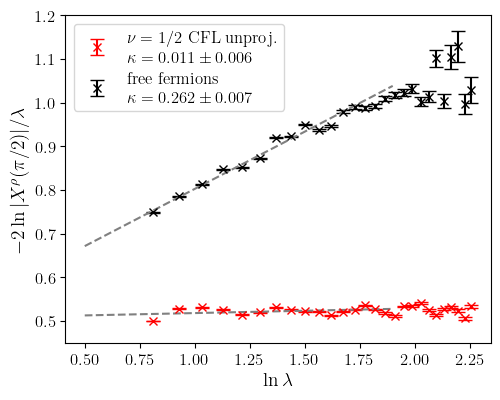

In [72]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.errorbar(np.log(x_cfl0), (entropy_cfl0[:,0]/x_cfl0), entropy_cfl0[:,1], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL unproj. \n $\kappa = {popt_cfl0[0]:.3f} \\pm {np.sqrt(pcov_cfl0[0,0]):.3f}$')
#ax.errorbar(np.log(x_cfl2), (entropy_cfl2[:,0]/x_cfl2), entropy_cfl2[:,1], marker='x',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL proj. \n $\kappa = {popt_cfl2[0]:.3f} \\pm {np.sqrt(pcov_cfl2[0,0]):.3f}$')
ax.errorbar(np.log(x_ff), (entropy_ff[:,0]/x_ff), entropy_ff[:,1], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\kappa = {popt_ff[0]:.3f} \\pm {np.sqrt(pcov_ff[0,0]):.3f}$')
#ax[0].text(1.2, 1.55, "total", fontsize=16)
ax.plot(x_fit, y_fit_cfl0, '--', c='gray')
#ax.plot(x_fit, y_fit_cfl2, '--', c='gray')
ax.plot(x_fit, y_fit_ff, '--', c='gray')

ax.legend(loc='upper left')

#ax[1].errorbar(x_ff, (entropy_cfl2[:,0] - entropy_ff[:,0])/entropy_ff[:,0], entropy_cfl2[:,1],
#               marker='x')
ax.set_xlabel("$\\ln \\lambda$")
ax.set_ylabel("$-2 \\ln |X^{\\rho} (\\pi/2)| /\\lambda$")

ax.set_ylim(0.45, 1.2)
fig.tight_layout(pad=0.5)
#plt.savefig("disorder operator m=2 n=37.pdf")

In [61]:
x_cfl0, entropy_cfl0 = LoadDisorderOperator(69, 138, 5e6, 1e5, 1j, 'circle', 'cfl0')
#x_cfl2, entropy_cfl2 = LoadDisorderOperator(37, 74, 5e6, 1e5, 1j, 'circle', 'cfl2')
x_ff, entropy_ff = LoadDisorderOperator(69, 138, 10e6, 1e5, 1j, 'circle', 'free_fermions')

popt_cfl0, pcov_cfl0 = np.polyfit(np.log(x_cfl0), entropy_cfl0[:,0]/x_cfl0, deg=1, cov=True, w=1/entropy_cfl0[:,1])
#popt_cfl2, pcov_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,0]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,1])
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), entropy_ff[:,0]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,1])

x_fit = np.linspace(0.5, 1.9,2)
y_fit_cfl0 = x_fit*popt_cfl0[0] + popt_cfl0[1]
#y_fit_cfl2 = x_fit*popt_cfl2[0] + popt_cfl2[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

Ne = 69



C:\Users\crist\AppData\Local\Temp\ipykernel_16176\2496975006.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=0.5)
C:\Users\crist\AppData\Local\Temp\ipykernel_16176\2496975006.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [ ]:
Nes = [37,69]
fig, ax = plt.subplots(1,2, figsize=(11,5))

for i in range(len(Nes)):
    ax[i].errorbar(np.log(x_cfl0), (entropy_cfl0[:,0]/x_cfl0), entropy_cfl0[:,1], marker='x',
                color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
                label=f'$\\nu = 1/2$ CFL unproj. \n $\kappa = {popt_cfl0[0]:.3f} \\pm {np.sqrt(pcov_cfl0[0,0]):.3f}$')
    ax[i].errorbar(np.log(x_cfl2), (entropy_cfl2[:,0]/x_cfl2), entropy_cfl2[:,1], marker='x',
                color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
                label=f'$\\nu = 1/2$ CFL proj. \n $\kappa = {popt_cfl2[0]:.3f} \\pm {np.sqrt(pcov_cfl2[0,0]):.3f}$')
    ax[i].errorbar(np.log(x_ff), (entropy_ff[:,0]/x_ff), entropy_ff[:,1], marker='x',
                color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
                label=f'free fermions \n $\kappa = {popt_ff[0]:.3f} \\pm {np.sqrt(pcov_ff[0,0]):.3f}$')
    #ax[0].text(1.2, 1.55, "total", fontsize=16)
    ax[i].plot(x_fit, y_fit_cfl0, '--', c='gray')
    ax[i].plot(x_fit, y_fit_cfl2, '--', c='gray')
    ax[i].plot(x_fit, y_fit_ff, '--', c='gray')

    ax[i].legend(loc='upper left')

    #ax[1].errorbar(x_ff, (entropy_cfl2[:,0] - entropy_ff[:,0])/entropy_ff[:,0], entropy_cfl2[:,1],
    #               marker='x')
    ax[0].set_xlabel("$\\ln \\lambda$")
    ax[0].set_ylabel("$-2 \\ln |X^{\\rho} (\\pi/2)| /\\lambda$")

    ax[0].set_ylim(0.45, 1.2)
    #fig.tight_layout(pad=0.5)
    #plt.savefig("disorder operator m=2 n=37.pdf")